In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

In [2]:
warnings.filterwarnings("ignore")

In [3]:
encoder = LabelEncoder()

In [4]:
data = pd.read_csv("./player_combined_2021_2022.csv")

In [5]:
data_goalkeeping = pd.read_csv("./goalkeeper_combined_2021_2022.csv")

In [6]:
data

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,Foul_drawn,Offsides,Tackles_to_win_possession,PKwon,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%
0,0,Max Aarons,eng ENG,DF,Norwich City,eng Premier League,21,2000,32.0,64.0,...,52,1,44,0.0,2.0,1,154.0,13.0,50.0,20.6
1,1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,33,1987,33.1,48.0,...,25,0,27,0.0,1.0,0,195.0,62.0,38.0,62.0
2,2,Salis Abdul Samed,gh GHA,MF,Clermont Foot,fr Ligue 1,21,2000,27.4,43.0,...,37,0,23,0.0,0.0,0,186.0,17.0,20.0,45.9
3,3,Laurent Abergel,fr FRA,MF,Lorient,fr Ligue 1,28,1993,32.8,110.0,...,69,1,60,0.0,0.0,0,264.0,11.0,7.0,61.1
4,4,Charles Abi,fr FRA,FW,Saint-Étienne,fr Ligue 1,21,2000,0.5,0.0,...,0,0,0,0.0,0.0,0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2916,Martín Zubimendi,es ESP,MF,Real Sociedad,es La Liga,22,1999,28.8,52.0,...,21,3,25,0.0,0.0,0,139.0,63.0,24.0,72.4
2912,2917,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,23,1997,25.6,58.0,...,67,0,33,0.0,1.0,0,162.0,24.0,32.0,42.9
2913,2918,Martin Ødegaard,no NOR,"MF,FW",Arsenal,eng Premier League,22,1998,30.9,49.0,...,20,3,21,0.0,2.0,0,162.0,14.0,23.0,37.8
2914,2919,Milan Đurić,ba BIH,FW,Salernitana,it Serie A,31,1990,24.1,1.0,...,45,6,1,1.0,0.0,0,40.0,242.0,83.0,74.5


In [7]:
data["Comp"].value_counts()

Comp
it Serie A            631
es La Liga            615
fr Ligue 1            603
eng Premier League    544
de Bundesliga         523
Name: count, dtype: int64

In [8]:
data.isnull().sum()

Unnamed: 0            0
Player                0
Nation                0
Pos                   1
Squad                 0
                   ... 
OG                    0
recovered_balls       2
Aerial_duel_won       2
Aerial_duel_lost      2
Aerial_duel_won%    225
Length: 137, dtype: int64

In [9]:
data = data.dropna(subset=["Pos"])

In [10]:
data.shape

(2915, 137)

In [11]:
data.fillna(0, inplace=True)

In [88]:
def correlation_matrix(df, title, width = 16, height = 12):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(width, height))
    plt.title(title)
    sns.heatmap(corr, cmap='Blues', ax=ax, annot=True) 
    

In [13]:
data['Pos'] = data['Pos'].str.split(',')

In [14]:
all_positions = set([position for positions_list in data['Pos'] for position in positions_list])

In [15]:
for position in all_positions:
    data[position] = data['Pos'].apply(lambda positions_list: 1 if position in positions_list else 0)

In [16]:
data["Nation"] = data["Nation"].apply(lambda x: x.split(" ")[1] )

In [17]:
data

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,...,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,DF,GK,MF,FW
0,0,Max Aarons,ENG,[DF],Norwich City,eng Premier League,21,2000,32.0,64.0,...,2.0,1,154.0,13.0,50.0,20.6,1,0,0,0
1,1,Yunis Abdelhamid,MAR,[DF],Reims,fr Ligue 1,33,1987,33.1,48.0,...,1.0,0,195.0,62.0,38.0,62.0,1,0,0,0
2,2,Salis Abdul Samed,GHA,[MF],Clermont Foot,fr Ligue 1,21,2000,27.4,43.0,...,0.0,0,186.0,17.0,20.0,45.9,0,0,1,0
3,3,Laurent Abergel,FRA,[MF],Lorient,fr Ligue 1,28,1993,32.8,110.0,...,0.0,0,264.0,11.0,7.0,61.1,0,0,1,0
4,4,Charles Abi,FRA,[FW],Saint-Étienne,fr Ligue 1,21,2000,0.5,0.0,...,0.0,0,1.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2916,Martín Zubimendi,ESP,[MF],Real Sociedad,es La Liga,22,1999,28.8,52.0,...,0.0,0,139.0,63.0,24.0,72.4,0,0,1,0
2912,2917,Szymon Żurkowski,POL,[MF],Empoli,it Serie A,23,1997,25.6,58.0,...,1.0,0,162.0,24.0,32.0,42.9,0,0,1,0
2913,2918,Martin Ødegaard,NOR,"[MF, FW]",Arsenal,eng Premier League,22,1998,30.9,49.0,...,2.0,0,162.0,14.0,23.0,37.8,0,0,1,1
2914,2919,Milan Đurić,BIH,[FW],Salernitana,it Serie A,31,1990,24.1,1.0,...,0.0,0,40.0,242.0,83.0,74.5,0,0,0,1


In [18]:
all_positions

{'DF', 'FW', 'GK', 'MF'}

In [19]:
data.isnull().sum()

Unnamed: 0          0
Player              0
Nation              0
Pos                 0
Squad               0
                   ..
Aerial_duel_won%    0
DF                  0
GK                  0
MF                  0
FW                  0
Length: 141, dtype: int64

In [20]:
data = data.drop(columns=["Unnamed: 0"])

In [21]:
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklWon,...,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,DF,GK,MF,FW
0,Max Aarons,ENG,[DF],Norwich City,eng Premier League,21,2000,32.0,64.0,44,...,2.0,1,154.0,13.0,50.0,20.6,1,0,0,0
1,Yunis Abdelhamid,MAR,[DF],Reims,fr Ligue 1,33,1987,33.1,48.0,27,...,1.0,0,195.0,62.0,38.0,62.0,1,0,0,0
2,Salis Abdul Samed,GHA,[MF],Clermont Foot,fr Ligue 1,21,2000,27.4,43.0,23,...,0.0,0,186.0,17.0,20.0,45.9,0,0,1,0
3,Laurent Abergel,FRA,[MF],Lorient,fr Ligue 1,28,1993,32.8,110.0,60,...,0.0,0,264.0,11.0,7.0,61.1,0,0,1,0
4,Charles Abi,FRA,[FW],Saint-Étienne,fr Ligue 1,21,2000,0.5,0.0,0,...,0.0,0,1.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,ESP,[MF],Real Sociedad,es La Liga,22,1999,28.8,52.0,25,...,0.0,0,139.0,63.0,24.0,72.4,0,0,1,0
2912,Szymon Żurkowski,POL,[MF],Empoli,it Serie A,23,1997,25.6,58.0,33,...,1.0,0,162.0,24.0,32.0,42.9,0,0,1,0
2913,Martin Ødegaard,NOR,"[MF, FW]",Arsenal,eng Premier League,22,1998,30.9,49.0,21,...,2.0,0,162.0,14.0,23.0,37.8,0,0,1,1
2914,Milan Đurić,BIH,[FW],Salernitana,it Serie A,31,1990,24.1,1.0,1,...,0.0,0,40.0,242.0,83.0,74.5,0,0,0,1


In [22]:
standard_features = [
    "Player",
    "MF",
    "FW",
    "GK",
    "DF",
    "Age",
    "Nation",
    "Squad",
    "Comp",
    "MP",
    "Min",
    "90s",
]

In [23]:
defensive_features = [
    "Tkl",
    "TklWon",
    "Tkl_Def_3rd",
    "Tkl_Mid_3rd",
    "Dribbler_Tkl",
    "Tkl_Att",
    "Tkl%",
    "Total_blocks",
    "Shots_Blocked",
    "Passes_Blocked",
    "Int",
    "Tkl+Int",
    "Clr",
    "Tackles_to_win_possession",
    "recovered_balls"
]

In [24]:
possession_features = [
    "Touches",
    "Touches_def_penalty_area",
    "Touches_def_3rd",
    "Touches_mid_3rd",
    "Touches_att_3rd",
    "Touches_att_penalty_area",
    "Touches_live_ball",
    "Dribble_succ",
    "Dribble_att",
    "Dribble_succ%",
]

In [25]:
chance_creation_features = [
    "SCA",
    "SCA90",
    "live_pass_to_shot",
    "dead_pass_to_shot",
    "GCA",
    "GCA90",
    "live_pass_to_goal",
    "dead_pass_to_goal",
    "Ast",
    "xAG",
    "xA",
    "Ast90",
    "xAG90",
    "Drib_to_shot",
    "Drib_to_goal",
    "Shot_to_shot",
    "Shot_to_goal"
]

In [26]:
passing_features = [
    "passes_cmp",
    "passes_att",
    "passes_cmp%",
    "pass_into_att_3rd",
    "cross_cmp_into_18_yards",
    "prg_pass_opponent_area",
    "Live_ball_passes",
    "Dead_ball_passes",
    "pass_40_yards",
    "Crs",
    "pass_5_15_cmp",
    "pass_5_15_att",
    "pass_5_15_cmp%",
    "pass_15_30_cmp",
    "pass_15_30_att",
    "pass_15_30_cmp%",
    "Prg_pass_dist",
    "direct_pass_to_shot",
    "pass_cmp_into_18_yards",
    "pass_betn_defender",
    "prog_pass_received",
]

In [27]:
attacking_features = [
    "Gls",
    "xG",
    "Gls90",
    "xG90",
    "Total_shots",
    "SoT",
    "SoT%",
    "G/Sh",
    "G/SoT",
    "npG-npxG",
    "G-PK",
    "npxG90",
    "shots/90",
    "SoT/90",
    "avg_shot_distance",
    "npxG",
    "npxG/Sh",
    "G-xG",
    "Aerial_duel_won",
    "Aerial_duel_lost",
    "Aerial_duel_won%",
]

In [28]:
goalkeeping_features = [
    "GA",
    "GA90",
    "SoTA",
    "Saves",
    "Save%",
    "CS",
    "CS%",
    "PKsv",
    "Pk_save%",
    "PSxG",
    "launch_cmp",
    "launch_cmp%",
    "pass_att",
    "Thr",
    "launch_pass%",
    "Gk_avglen",
    "Stp",
    "Stp%",
    "#OPA",
    "#OPA/90",
    "AvgDist",
]

In [29]:
data["Nation"] = encoder.fit_transform(data["Nation"])

In [30]:
nation_mappings = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [31]:
nation_mappings

{'ALB': 0,
 'ALG': 1,
 'ANG': 2,
 'ARG': 3,
 'ARM': 4,
 'AUS': 5,
 'AUT': 6,
 'BEL': 7,
 'BEN': 8,
 'BFA': 9,
 'BIH': 10,
 'BRA': 11,
 'BUL': 12,
 'CAN': 13,
 'CGO': 14,
 'CHA': 15,
 'CHI': 16,
 'CHN': 17,
 'CIV': 18,
 'CMR': 19,
 'COD': 20,
 'COL': 21,
 'CPV': 22,
 'CRC': 23,
 'CRO': 24,
 'CTA': 25,
 'CYP': 26,
 'CZE': 27,
 'DEN': 28,
 'DOM': 29,
 'ECU': 30,
 'EGY': 31,
 'ENG': 32,
 'EQG': 33,
 'ESP': 34,
 'FIN': 35,
 'FRA': 36,
 'GAB': 37,
 'GAM': 38,
 'GEO': 39,
 'GER': 40,
 'GHA': 41,
 'GLP': 42,
 'GNB': 43,
 'GRE': 44,
 'GRN': 45,
 'GUF': 46,
 'GUI': 47,
 'HON': 48,
 'HUN': 49,
 'IRL': 50,
 'IRN': 51,
 'ISL': 52,
 'ISR': 53,
 'ITA': 54,
 'JAM': 55,
 'JPN': 56,
 'KOR': 57,
 'KVX': 58,
 'LUX': 59,
 'MAD': 60,
 'MAR': 61,
 'MEX': 62,
 'MKD': 63,
 'MLI': 64,
 'MNE': 65,
 'MOZ': 66,
 'MTQ': 67,
 'NED': 68,
 'NGA': 69,
 'NIR': 70,
 'NOR': 71,
 'NZL': 72,
 'PAN': 73,
 'PAR': 74,
 'PER': 75,
 'PHI': 76,
 'POL': 77,
 'POR': 78,
 'REU': 79,
 'ROU': 80,
 'RSA': 81,
 'RUS': 82,
 'SCO': 83,
 '

In [32]:
encoder_squad = LabelEncoder()

In [33]:
data["Squad"] = encoder_squad.fit_transform(data["Squad"])

In [34]:
squad_mappings = dict(zip(encoder_squad.classes_, encoder_squad.transform(encoder_squad.classes_)))

In [35]:
squad_mappings

{'Alavés': 0,
 'Angers': 1,
 'Arminia': 2,
 'Arsenal': 3,
 'Aston Villa': 4,
 'Atalanta': 5,
 'Athletic Club': 6,
 'Atlético Madrid': 7,
 'Augsburg': 8,
 'Barcelona': 9,
 'Bayern Munich': 10,
 'Betis': 11,
 'Bochum': 12,
 'Bologna': 13,
 'Bordeaux': 14,
 'Brentford': 15,
 'Brest': 16,
 'Brighton': 17,
 'Burnley': 18,
 'Cagliari': 19,
 'Celta Vigo': 20,
 'Chelsea': 21,
 'Clermont Foot': 22,
 'Crystal Palace': 23,
 'Cádiz': 24,
 'Dortmund': 25,
 'Eint Frankfurt': 26,
 'Elche': 27,
 'Empoli': 28,
 'Espanyol': 29,
 'Everton': 30,
 'Fiorentina': 31,
 'Freiburg': 32,
 'Genoa': 33,
 'Getafe': 34,
 'Granada': 35,
 'Greuther Fürth': 36,
 'Hellas Verona': 37,
 'Hertha BSC': 38,
 'Hoffenheim': 39,
 'Inter': 40,
 'Juventus': 41,
 'Köln': 42,
 'Lazio': 43,
 'Leeds United': 44,
 'Leicester City': 45,
 'Lens': 46,
 'Levante': 47,
 'Leverkusen': 48,
 'Lille': 49,
 'Liverpool': 50,
 'Lorient': 51,
 'Lyon': 52,
 "M'Gladbach": 53,
 'Mainz 05': 54,
 'Mallorca': 55,
 'Manchester City': 56,
 'Manchester Utd

In [36]:
data

,Player,Nation,Pos,Squad,Comp,Age,Born,90s,Tkl,TklWon,...,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,DF,GK,MF,FW
0,Max Aarons,32,[DF],67,eng Premier League,21,2000,32.0,64.0,44,...,2.0,1,154.0,13.0,50.0,20.6,1,0,0,0
1,Yunis Abdelhamid,61,[DF],74,fr Ligue 1,33,1987,33.1,48.0,27,...,1.0,0,195.0,62.0,38.0,62.0,1,0,0,0
2,Salis Abdul Samed,41,[MF],22,fr Ligue 1,21,2000,27.4,43.0,23,...,0.0,0,186.0,17.0,20.0,45.9,0,0,1,0
3,Laurent Abergel,36,[MF],51,fr Ligue 1,28,1993,32.8,110.0,60,...,0.0,0,264.0,11.0,7.0,61.1,0,0,1,0
4,Charles Abi,36,[FW],77,fr Ligue 1,21,2000,0.5,0.0,0,...,0.0,0,1.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,34,[MF],73,es La Liga,22,1999,28.8,52.0,25,...,0.0,0,139.0,63.0,24.0,72.4,0,0,1,0
2912,Szymon Żurkowski,77,[MF],28,it Serie A,23,1997,25.6,58.0,33,...,1.0,0,162.0,24.0,32.0,42.9,0,0,1,0
2913,Martin Ødegaard,71,"[MF, FW]",3,eng Premier League,22,1998,30.9,49.0,21,...,2.0,0,162.0,14.0,23.0,37.8,0,0,1,1
2914,Milan Đurić,10,[FW],78,it Serie A,31,1990,24.1,1.0,1,...,0.0,0,40.0,242.0,83.0,74.5,0,0,0,1


In [37]:
data = data.drop(columns=["Pos"])

In [38]:
data

,Player,Nation,Squad,Comp,Age,Born,90s,Tkl,TklWon,Tkl_Def_3rd,...,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,DF,GK,MF,FW
0,Max Aarons,32,67,eng Premier League,21,2000,32.0,64.0,44,49.0,...,2.0,1,154.0,13.0,50.0,20.6,1,0,0,0
1,Yunis Abdelhamid,61,74,fr Ligue 1,33,1987,33.1,48.0,27,34.0,...,1.0,0,195.0,62.0,38.0,62.0,1,0,0,0
2,Salis Abdul Samed,41,22,fr Ligue 1,21,2000,27.4,43.0,23,25.0,...,0.0,0,186.0,17.0,20.0,45.9,0,0,1,0
3,Laurent Abergel,36,51,fr Ligue 1,28,1993,32.8,110.0,60,44.0,...,0.0,0,264.0,11.0,7.0,61.1,0,0,1,0
4,Charles Abi,36,77,fr Ligue 1,21,2000,0.5,0.0,0,0.0,...,0.0,0,1.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,34,73,es La Liga,22,1999,28.8,52.0,25,19.0,...,0.0,0,139.0,63.0,24.0,72.4,0,0,1,0
2912,Szymon Żurkowski,77,28,it Serie A,23,1997,25.6,58.0,33,24.0,...,1.0,0,162.0,24.0,32.0,42.9,0,0,1,0
2913,Martin Ødegaard,71,3,eng Premier League,22,1998,30.9,49.0,21,6.0,...,2.0,0,162.0,14.0,23.0,37.8,0,0,1,1
2914,Milan Đurić,10,78,it Serie A,31,1990,24.1,1.0,1,0.0,...,0.0,0,40.0,242.0,83.0,74.5,0,0,0,1


In [39]:
unique_values = data["Comp"].unique()

In [40]:
unique_values

array(['eng Premier League', 'fr Ligue 1', 'de Bundesliga', 'it Serie A',
       'es La Liga'], dtype=object)

In [41]:
value_to_int_comp = {value: index for index, value in enumerate(unique_values)}

In [42]:
value_to_int_comp

{'eng Premier League': 0,
 'fr Ligue 1': 1,
 'de Bundesliga': 2,
 'it Serie A': 3,
 'es La Liga': 4}

In [43]:
data['Comp'] = data['Comp'].map(value_to_int_comp)

In [44]:
data

,Player,Nation,Squad,Comp,Age,Born,90s,Tkl,TklWon,Tkl_Def_3rd,...,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,DF,GK,MF,FW
0,Max Aarons,32,67,0,21,2000,32.0,64.0,44,49.0,...,2.0,1,154.0,13.0,50.0,20.6,1,0,0,0
1,Yunis Abdelhamid,61,74,1,33,1987,33.1,48.0,27,34.0,...,1.0,0,195.0,62.0,38.0,62.0,1,0,0,0
2,Salis Abdul Samed,41,22,1,21,2000,27.4,43.0,23,25.0,...,0.0,0,186.0,17.0,20.0,45.9,0,0,1,0
3,Laurent Abergel,36,51,1,28,1993,32.8,110.0,60,44.0,...,0.0,0,264.0,11.0,7.0,61.1,0,0,1,0
4,Charles Abi,36,77,1,21,2000,0.5,0.0,0,0.0,...,0.0,0,1.0,0.0,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,34,73,4,22,1999,28.8,52.0,25,19.0,...,0.0,0,139.0,63.0,24.0,72.4,0,0,1,0
2912,Szymon Żurkowski,77,28,3,23,1997,25.6,58.0,33,24.0,...,1.0,0,162.0,24.0,32.0,42.9,0,0,1,0
2913,Martin Ødegaard,71,3,0,22,1998,30.9,49.0,21,6.0,...,2.0,0,162.0,14.0,23.0,37.8,0,0,1,1
2914,Milan Đurić,10,78,3,31,1990,24.1,1.0,1,0.0,...,0.0,0,40.0,242.0,83.0,74.5,0,0,0,1


In [55]:
scaler = MinMaxScaler()

In [56]:
scaled_data = scaler.fit_transform(data.iloc[:,1:])

In [57]:
data_scaled = pd.DataFrame(scaled_data, columns=data.columns[1:])

In [58]:
data_scaled["Player"] = data["Player"]

In [59]:
data_scaled

,Nation,Squad,Comp,Age,Born,90s,Tkl,TklWon,Tkl_Def_3rd,Tkl_Mid_3rd,...,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,DF,GK,MF,FW,Player
0,0.313725,0.690722,0.00,0.24,0.76,0.842105,0.520325,0.619718,0.731343,0.230769,...,0.5,0.513333,0.046263,0.301205,0.206,1.0,0.0,0.0,0.0,Max Aarons
1,0.598039,0.762887,0.25,0.72,0.24,0.871053,0.390244,0.380282,0.507463,0.215385,...,0.0,0.650000,0.220641,0.228916,0.620,1.0,0.0,0.0,0.0,Yunis Abdelhamid
2,0.401961,0.226804,0.25,0.24,0.76,0.721053,0.349593,0.323944,0.373134,0.246154,...,0.0,0.620000,0.060498,0.120482,0.459,0.0,0.0,1.0,0.0,Salis Abdul Samed
3,0.352941,0.525773,0.25,0.52,0.48,0.863158,0.894309,0.845070,0.656716,0.815385,...,0.0,0.880000,0.039146,0.042169,0.611,0.0,0.0,1.0,0.0,Laurent Abergel
4,0.352941,0.793814,0.25,0.24,0.76,0.013158,0.000000,0.000000,0.000000,0.000000,...,0.0,0.003333,0.000000,0.000000,0.000,0.0,0.0,0.0,1.0,Charles Abi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910,0.333333,0.752577,1.00,0.28,0.72,0.757895,0.422764,0.352113,0.283582,0.461538,...,0.0,0.463333,0.224199,0.144578,0.724,0.0,0.0,1.0,0.0,Igor Zubeldia
2911,0.754902,0.288660,0.75,0.32,0.64,0.673684,0.471545,0.464789,0.358209,0.323077,...,0.0,0.540000,0.085409,0.192771,0.429,0.0,0.0,1.0,0.0,Martín Zubimendi
2912,0.696078,0.030928,0.00,0.28,0.68,0.813158,0.398374,0.295775,0.089552,0.369231,...,0.0,0.540000,0.049822,0.138554,0.378,0.0,0.0,1.0,1.0,Szymon Żurkowski
2913,0.098039,0.804124,0.75,0.64,0.36,0.634211,0.008130,0.014085,0.000000,0.015385,...,0.0,0.133333,0.861210,0.500000,0.745,0.0,0.0,0.0,1.0,Martin Ødegaard


In [60]:
data_standard_features = data_scaled[standard_features]

In [61]:
data_defensive_features = data_scaled[defensive_features]

In [62]:
data_possession_features = data_scaled[possession_features]

In [63]:
data_chance_creation_features = data_scaled[chance_creation_features]

In [64]:
data_passing_features = data_scaled[passing_features]

In [65]:
data_attacking_features = data_scaled[attacking_features]

In [66]:
data_goalkeeping

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,launch_pass%,pass_avglen,Gk_att,Gk_launched%,Gk_avglen,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,Julen Agirrezabala,ESP,GK,Athletic Club,La Liga,20,2000,4,4,360,...,33.9,33.1,26.0,46.2,36.0,1.0,2.1,6.0,1.50,17.5
1,Doğan Alemdar,TUR,GK,Rennes,Ligue 1,18,2002,12,12,1080,...,27.4,30.3,70.0,84.3,54.9,8.0,5.5,24.0,2.00,19.1
2,Alisson,BRA,GK,Liverpool,Premier League,28,1992,36,36,3240,...,16.5,26.3,172.0,33.1,33.4,22.0,6.5,89.0,2.47,18.7
3,Alphonse Areola,FRA,GK,West Ham,Premier League,28,1993,1,1,90,...,69.2,46.3,14.0,71.4,48.5,1.0,6.7,0.0,0.00,5.5
4,Kepa Arrizabalaga,ESP,GK,Chelsea,Premier League,26,1994,4,4,360,...,19.7,26.4,21.0,28.6,27.6,2.0,4.5,8.0,2.00,18.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Freddie Woodman,ENG,GK,Newcastle Utd,Premier League,24,1997,4,4,360,...,50.6,38.1,39.0,66.7,47.9,3.0,5.5,0.0,0.00,7.8
213,Robin Zentner,GER,GK,Mainz 05,Bundesliga,26,1994,32,32,2880,...,36.9,34.4,236.0,44.9,39.4,29.0,6.9,68.0,2.13,17.9
214,Luca Zidane,FRA,GK,Rayo Vallecano,La Liga,23,1998,8,8,645,...,36.0,34.6,53.0,56.6,46.6,9.0,10.0,6.0,0.84,11.0
215,Jeroen Zoet,NED,GK,Spezia,Serie A,30,1991,7,7,630,...,26.9,30.7,54.0,37.0,37.4,2.0,2.1,6.0,0.86,16.4


In [67]:
data_goalkeeping_features = data_goalkeeping[goalkeeping_features]

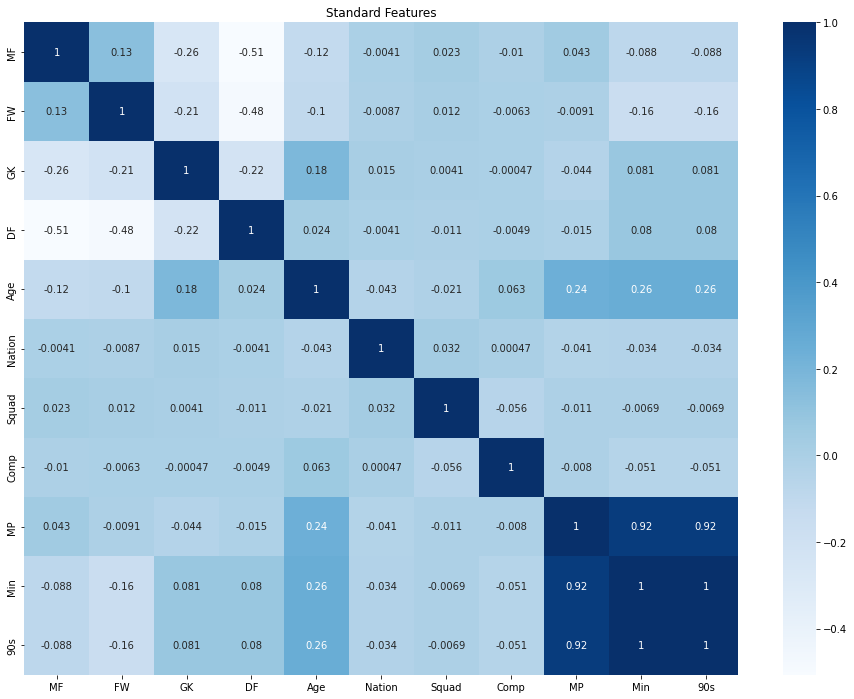

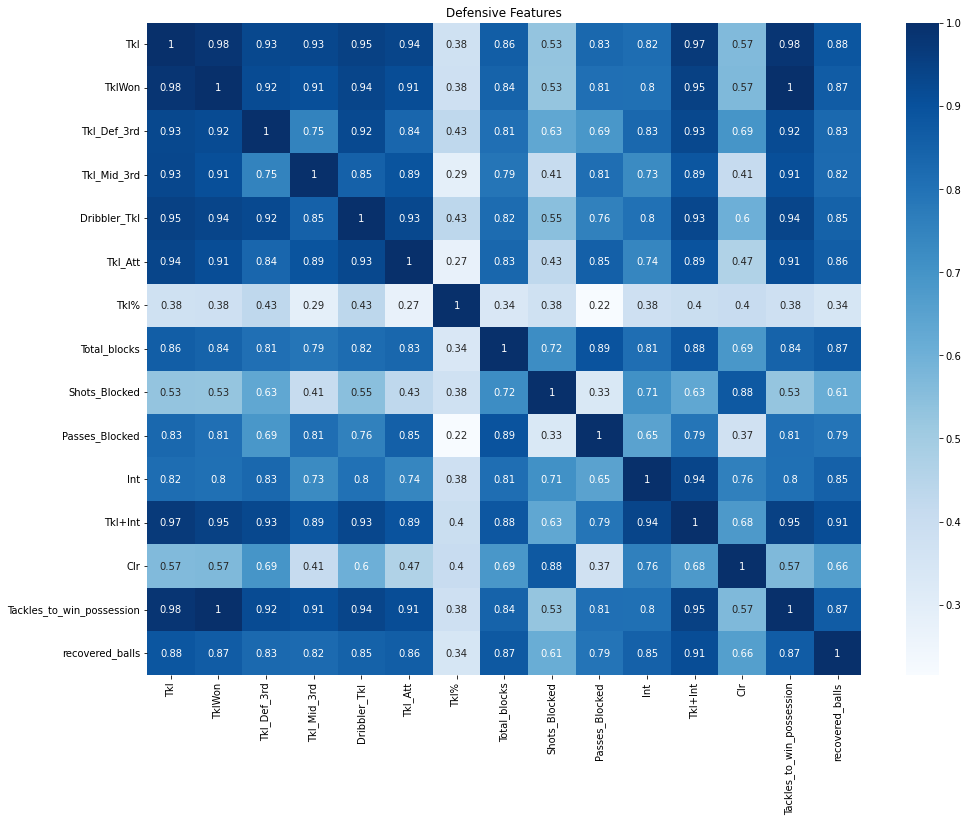

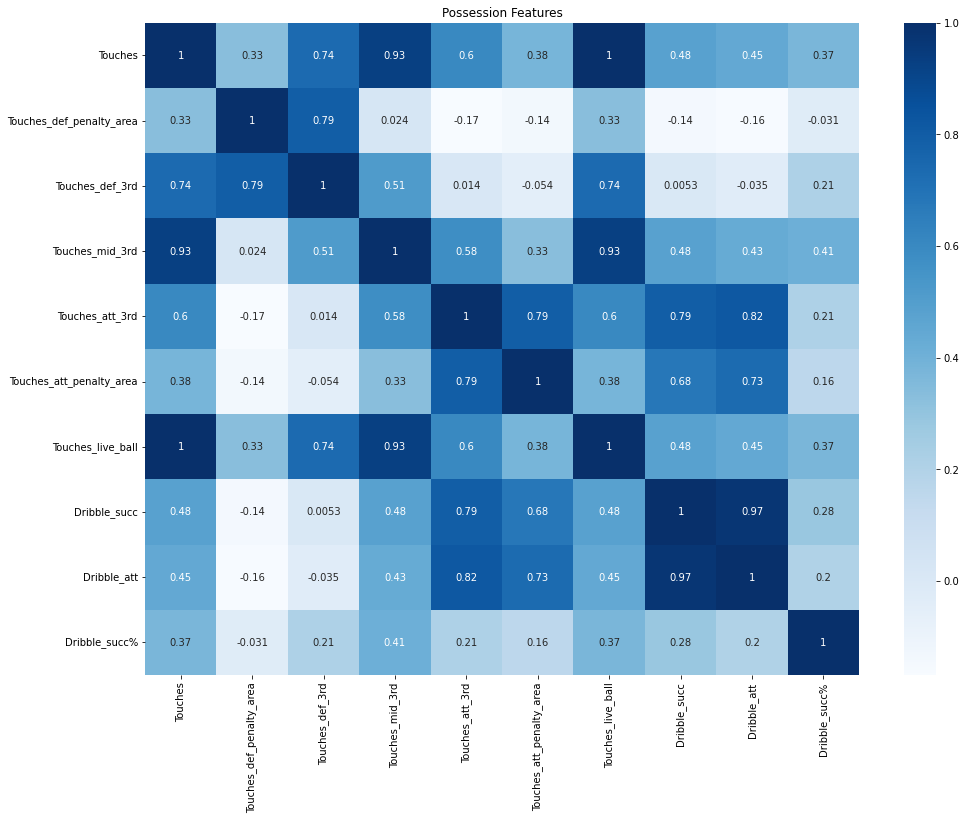

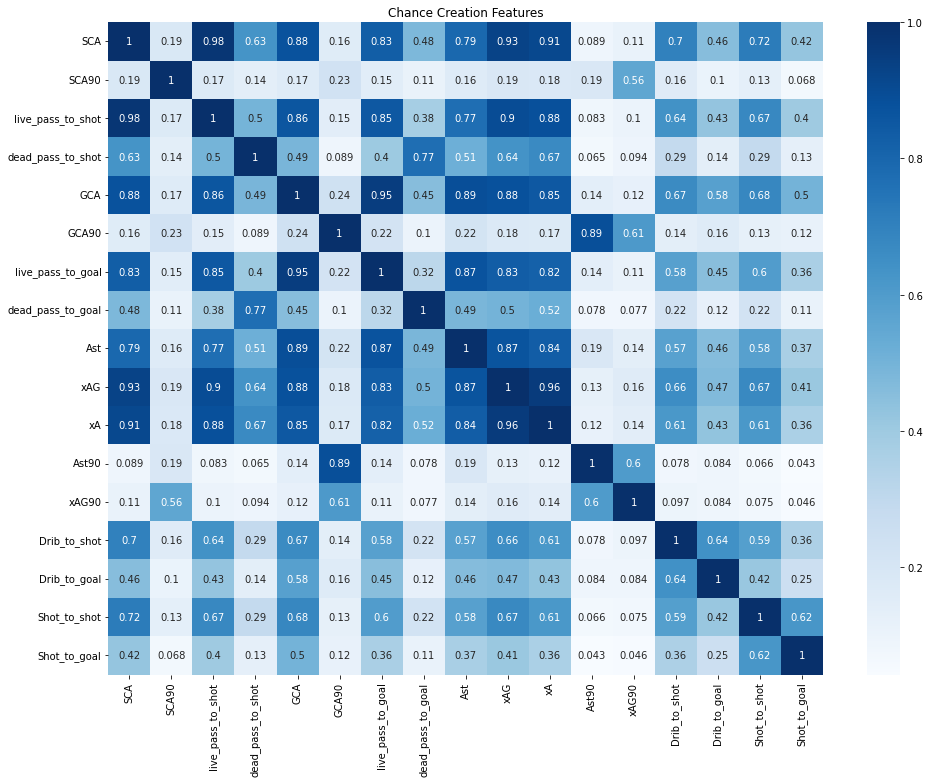

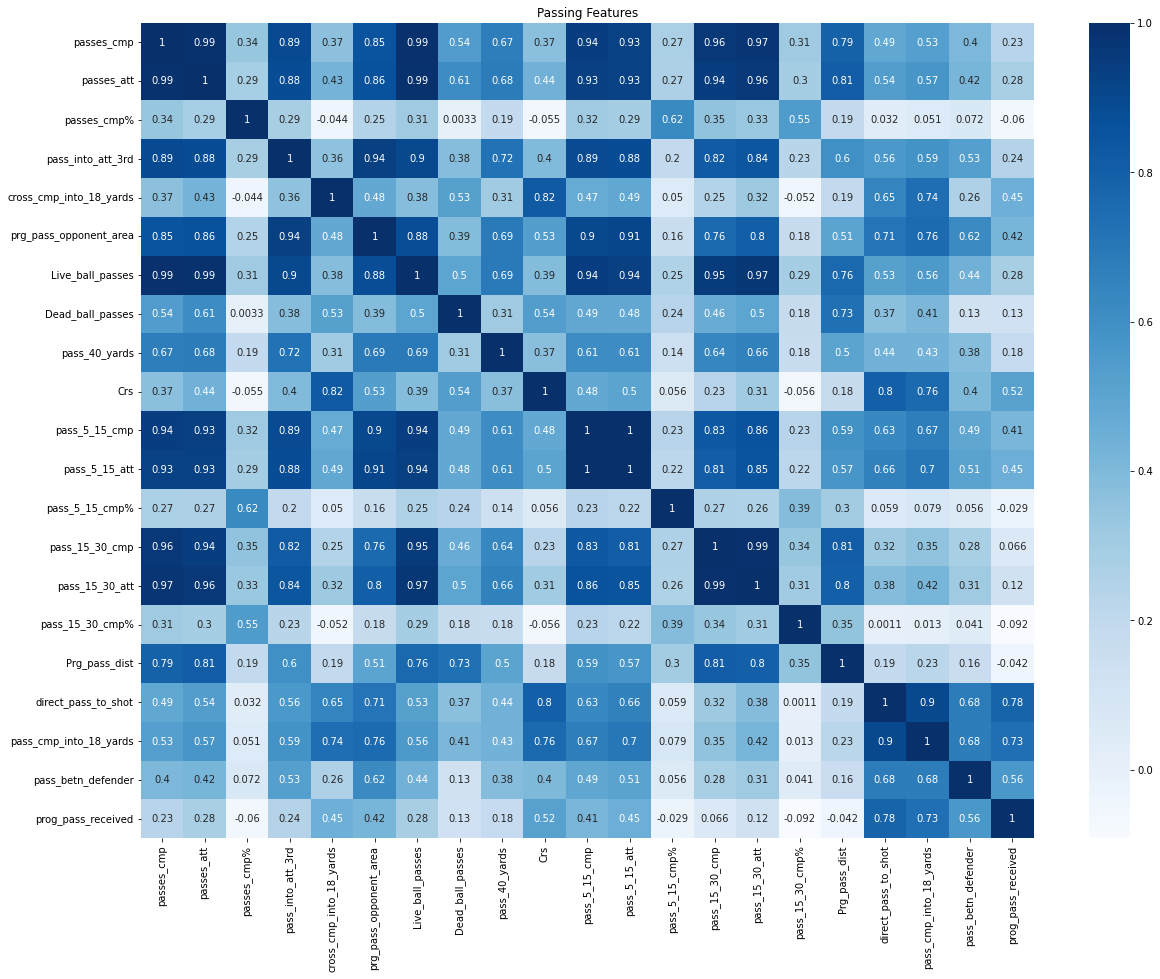

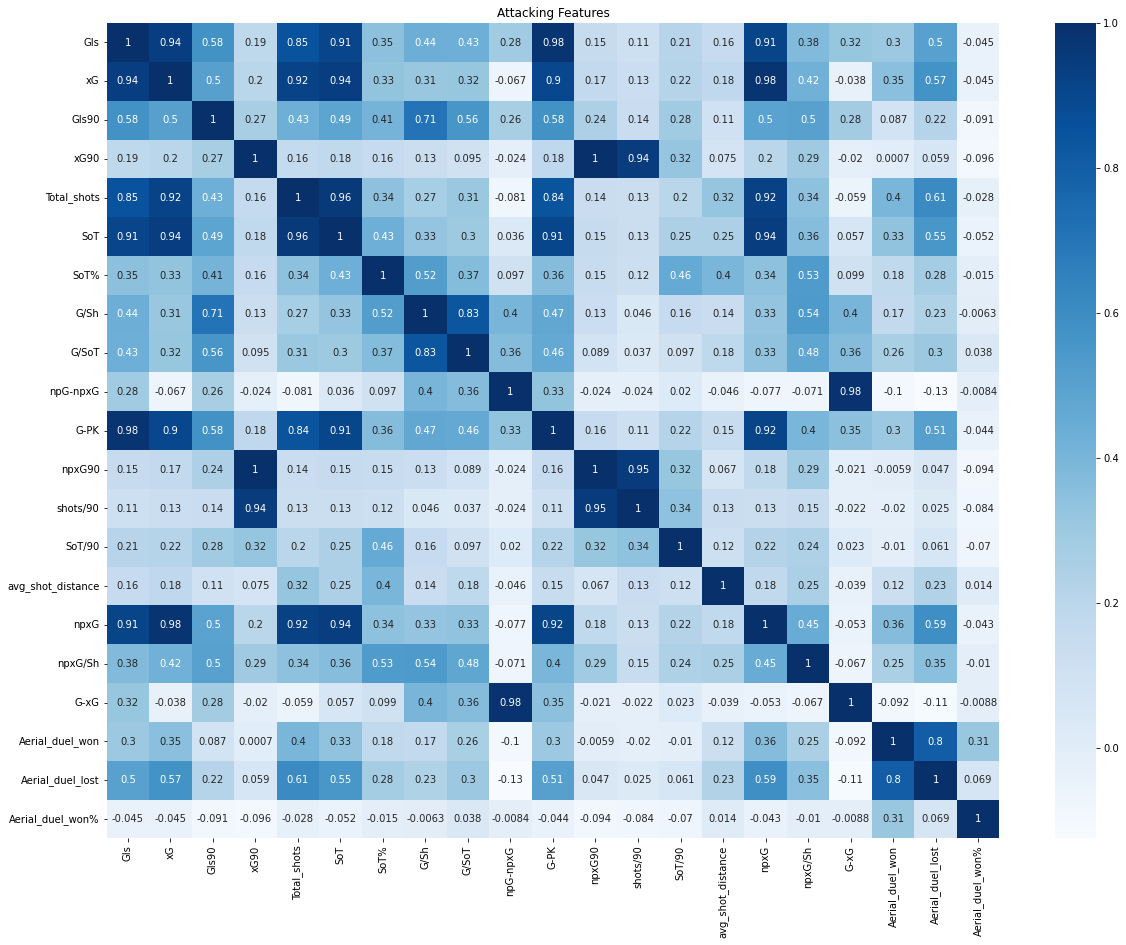

In [90]:
correlation_matrix(data_standard_features.iloc[:,1:], title = "Standard Features")
correlation_matrix(data_defensive_features, title = "Defensive Features")
correlation_matrix(data_possession_features, title = "Possession Features")
correlation_matrix(data_chance_creation_features, title = "Chance Creation Features")
correlation_matrix(data_passing_features, title = "Passing Features",  width = 20, height = 15)
correlation_matrix(data_attacking_features, title = "Attacking Features", width = 20, height = 15)

In [57]:
data_scaled.isnull().sum()

Nation    0
Squad     0
Comp      0
Age       0
Born      0
         ..
GK        0
FW        0
DF        0
MF        0
Player    1
Length: 139, dtype: int64

In [58]:
data_scaled = data_scaled.dropna()

In [59]:
data_standard_features

,Player,MF,FW,GK,DF,Age,Nation,Squad,Comp,MP,Min,90s
0,Max Aarons,0.0,0.0,0.0,1.0,0.24,0.313725,0.690722,0.00,0.891892,0.842352,0.842105
1,Yunis Abdelhamid,0.0,0.0,0.0,1.0,0.72,0.598039,0.762887,0.25,0.891892,0.872185,0.871053
2,Salis Abdul Samed,1.0,0.0,0.0,0.0,0.24,0.401961,0.226804,0.25,0.810811,0.719801,0.721053
3,Laurent Abergel,1.0,0.0,0.0,0.0,0.52,0.352941,0.525773,0.25,0.891892,0.864288,0.863158
4,Charles Abi,0.0,1.0,0.0,0.0,0.24,0.352941,0.793814,0.25,0.000000,0.012869,0.013158
...,...,...,...,...,...,...,...,...,...,...,...,...
2910,Igor Zubeldia,1.0,0.0,0.0,0.0,0.28,0.333333,0.752577,1.00,0.945946,0.757531,0.757895
2911,Martín Zubimendi,1.0,0.0,0.0,0.0,0.32,0.754902,0.288660,0.75,0.918919,0.674466,0.673684
2912,Szymon Żurkowski,1.0,1.0,0.0,0.0,0.28,0.696078,0.030928,0.00,0.945946,0.814273,0.813158
2913,Martin Ødegaard,0.0,1.0,0.0,0.0,0.64,0.098039,0.804124,0.75,0.864865,0.632934,0.634211


In [68]:
data_scaled.iloc[:, :-1].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2914 entries, 0 to 2914
Columns: 138 entries, Nation to MF
dtypes: float64(138)
memory usage: 3.1 MB


In [76]:
wcss = []

# distortions = []
for i in range(3, 50, 2):
    kmeans = KMeans(n_clusters=i, max_iter=20, n_init=10, random_state=42)
    kmeans.fit(data_scaled.iloc[:, :-1])
    wcss.append(kmeans.inertia_)

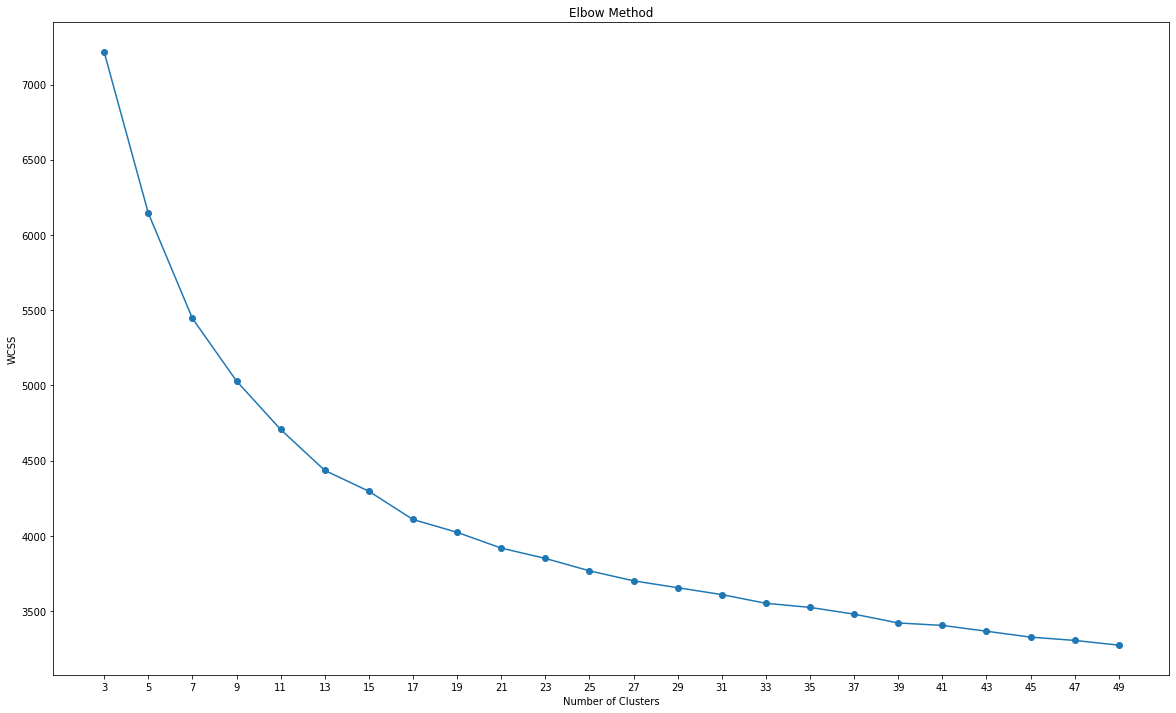

In [77]:
plt.figure(figsize=(20, 12))
plt.plot(range(3, 50, 2), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(3, 50, 2))
plt.show()

In [81]:
kmeans_full = KMeans(n_clusters=17,random_state=42)
kmeans_full.fit(data_scaled.iloc[:, :-1])
predicted_values = kmeans_full.fit_predict(data_scaled.iloc[:, :-1])

In [82]:
predicted_values

array([15,  9,  4, ..., 16,  8,  7])

In [83]:
player_names = data["Player"]

In [84]:
cluster_player_dict = {}
for cluster, player in zip(predicted_values, player_names):
    if cluster not in cluster_player_dict:
        cluster_player_dict[cluster] = []  
    cluster_player_dict[cluster].append(player)

In [91]:
for i  in cluster_player_dict.items():
    print(len(i[1]))

69
186
211
79
178
149
97
300
280
179
230
201
105
174
125
259
92


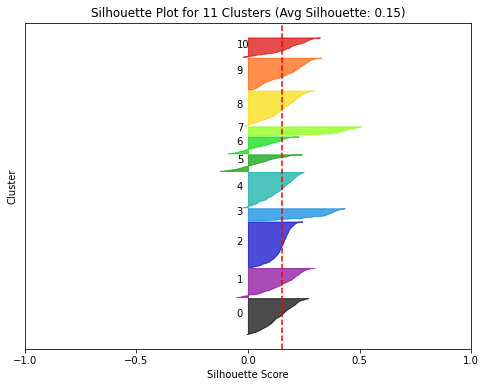

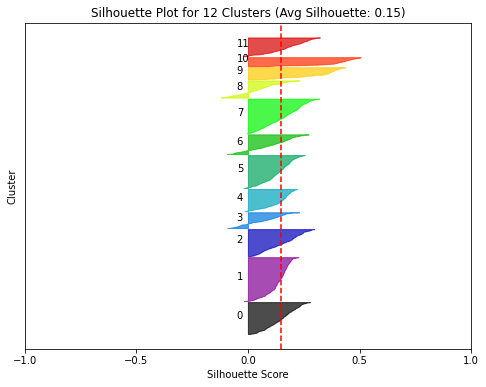

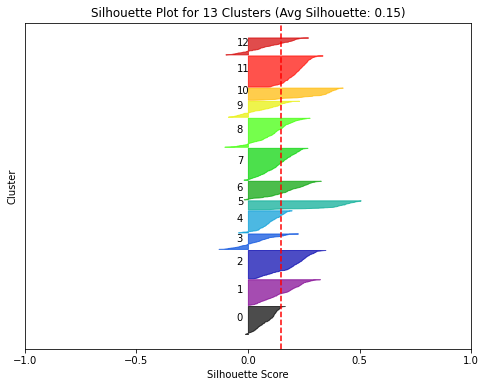

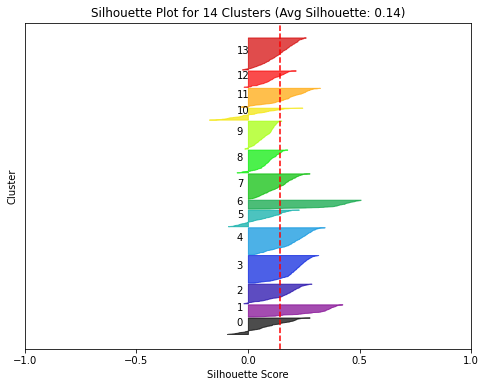

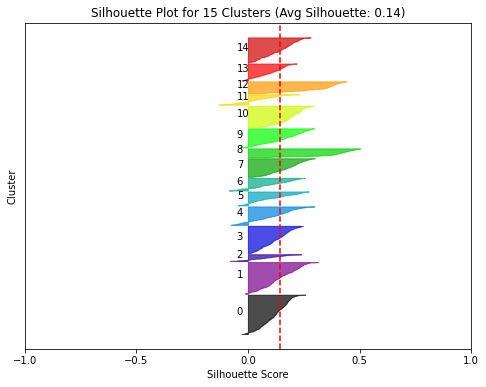

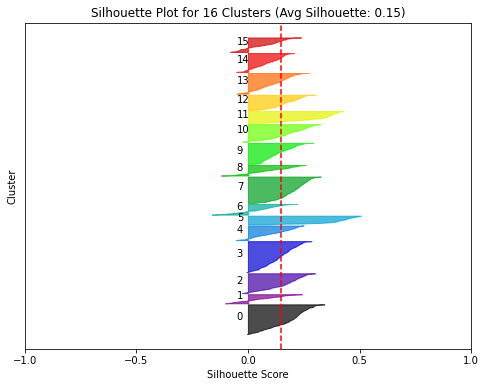

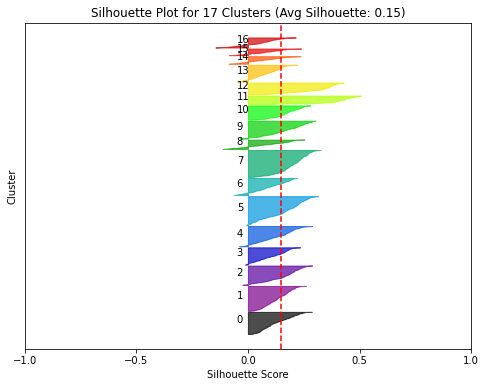

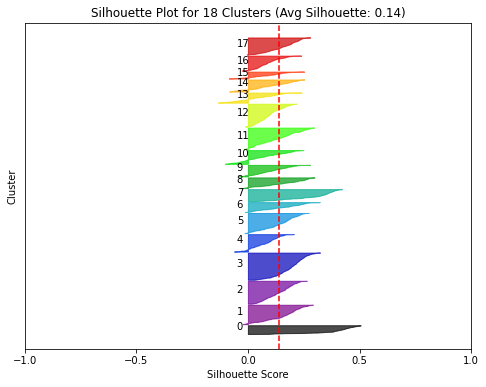

In [92]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate or load your image_2d data

cluster_numbers = np.arange(11,19) # Example list of cluster counts

for num_clusters in cluster_numbers:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled.iloc[:, :-1])

    silhouette_vals = silhouette_samples(data_scaled.iloc[:, :-1], cluster_labels)
    average_silhouette = np.mean(silhouette_vals)

    # Create a subplot for each cluster number
    plt.figure(figsize=(8, 6))
    plt.title(f'Silhouette Plot for {num_clusters} Clusters (Avg Silhouette: {average_silhouette:.2f})')

    y_lower = 10
    for i in range(num_clusters):
        ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
        ith_cluster_silhouette_vals.sort()

        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / num_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    plt.xlabel("Silhouette Score")
    plt.ylabel("Cluster")

    plt.axvline(x=average_silhouette, color="red", linestyle="--")
    plt.yticks([])
    plt.xticks([-1, -0.5, 0, 0.5, 1])
    plt.show()

In [93]:
def dimension_reduction(df, n_components, method="PCA"):
    if method == "PCA":
        pca = PCA(n_components=n_components, random_state=42)
        pca.fit(df)
        reduced_dimensions = pca.transform(df)
        return reduced_dimensions
    if method == "TSNE":
        tsne = TSNE(n_components=n_components, random_state=42)
        data_tsne = tsne.fit_transform(df)
        return(data_tsne)
        

In [94]:
reduce = dimension_reduction(data_standard_features.iloc[:,1:], 2)

In [95]:
reduce

array([[ 0.94063975,  0.61952447],
       [ 0.96548238,  0.67956982],
       [-0.2894551 ,  0.78506882],
       ...,
       [-0.74896232,  0.84550226],
       [-0.23118401,  0.40243656],
       [-0.91131933, -0.20032822]])

In [62]:
from sklearn.cluster import KMeans

In [96]:
tsne = TSNE(n_components=2, random_state=42)

In [97]:
data_tsne = tsne.fit_transform(data.iloc[:,1:])

In [98]:
kmeans = KMeans(n_clusters=8)

In [99]:
kmeans.fit(data_tsne)

KMeans()

In [100]:
data

,Player,Nation,Squad,Comp,Age,Born,90s,Tkl,TklWon,Tkl_Def_3rd,...,PKcon,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,GK,FW,DF,MF
0,Max Aarons,32,67,0,21,2000,32.0,64.0,44,49.0,...,2.0,1,154.0,13.0,50.0,20.6,0,0,1,0
1,Yunis Abdelhamid,61,74,1,33,1987,33.1,48.0,27,34.0,...,1.0,0,195.0,62.0,38.0,62.0,0,0,1,0
2,Salis Abdul Samed,41,22,1,21,2000,27.4,43.0,23,25.0,...,0.0,0,186.0,17.0,20.0,45.9,0,0,0,1
3,Laurent Abergel,36,51,1,28,1993,32.8,110.0,60,44.0,...,0.0,0,264.0,11.0,7.0,61.1,0,0,0,1
4,Charles Abi,36,77,1,21,2000,0.5,0.0,0,0.0,...,0.0,0,1.0,0.0,0.0,0.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,34,73,4,22,1999,28.8,52.0,25,19.0,...,0.0,0,139.0,63.0,24.0,72.4,0,0,0,1
2912,Szymon Żurkowski,77,28,3,23,1997,25.6,58.0,33,24.0,...,1.0,0,162.0,24.0,32.0,42.9,0,0,0,1
2913,Martin Ødegaard,71,3,0,22,1998,30.9,49.0,21,6.0,...,2.0,0,162.0,14.0,23.0,37.8,0,1,0,1
2914,Milan Đurić,10,78,3,31,1990,24.1,1.0,1,0.0,...,0.0,0,40.0,242.0,83.0,74.5,0,1,0,0


In [101]:
predicted_values = kmeans.fit_predict(data_tsne)

In [102]:
predicted_values.dtype

dtype('int32')

In [103]:
data.shape

(2915, 139)

In [104]:
predicted_values[:]

array([0, 6, 6, ..., 6, 4, 1])

In [105]:
data["cluster_number"] = predicted_values

In [106]:
data

,Player,Nation,Squad,Comp,Age,Born,90s,Tkl,TklWon,Tkl_Def_3rd,...,OG,recovered_balls,Aerial_duel_won,Aerial_duel_lost,Aerial_duel_won%,GK,FW,DF,MF,cluster_number
0,Max Aarons,32,67,0,21,2000,32.0,64.0,44,49.0,...,1,154.0,13.0,50.0,20.6,0,0,1,0,0
1,Yunis Abdelhamid,61,74,1,33,1987,33.1,48.0,27,34.0,...,0,195.0,62.0,38.0,62.0,0,0,1,0,6
2,Salis Abdul Samed,41,22,1,21,2000,27.4,43.0,23,25.0,...,0,186.0,17.0,20.0,45.9,0,0,0,1,6
3,Laurent Abergel,36,51,1,28,1993,32.8,110.0,60,44.0,...,0,264.0,11.0,7.0,61.1,0,0,0,1,6
4,Charles Abi,36,77,1,21,2000,0.5,0.0,0,0.0,...,0,1.0,0.0,0.0,0.0,0,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,Martín Zubimendi,34,73,4,22,1999,28.8,52.0,25,19.0,...,0,139.0,63.0,24.0,72.4,0,0,0,1,6
2912,Szymon Żurkowski,77,28,3,23,1997,25.6,58.0,33,24.0,...,0,162.0,24.0,32.0,42.9,0,0,0,1,3
2913,Martin Ødegaard,71,3,0,22,1998,30.9,49.0,21,6.0,...,0,162.0,14.0,23.0,37.8,0,1,0,1,6
2914,Milan Đurić,10,78,3,31,1990,24.1,1.0,1,0.0,...,0,40.0,242.0,83.0,74.5,0,1,0,0,4


In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
cluster_centroids = kmeans.cluster_centers_

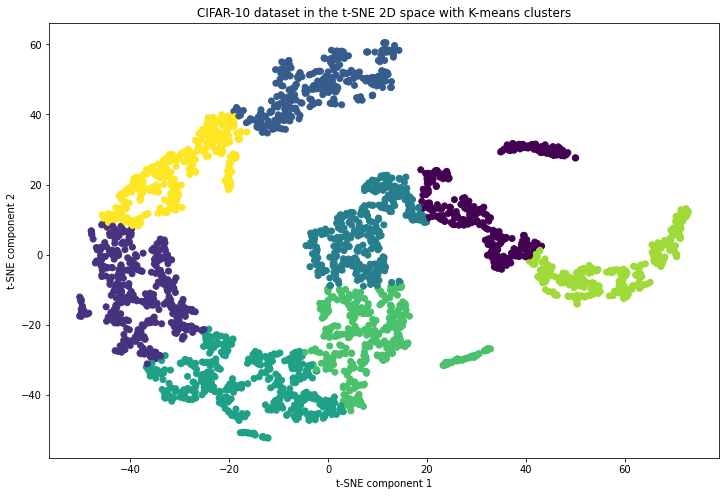

In [110]:
plt.figure(figsize=(12, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=predicted_values)
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('CIFAR-10 dataset in the t-SNE 2D space with K-means clusters')
plt.show()

In [81]:
scaled_data.shape

(2915, 138)

For Whole dataset

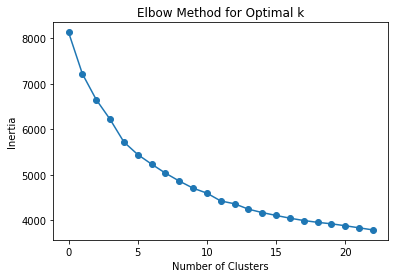

In [88]:
inertia = []
for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [94]:
player_names = data["Player"]

In [95]:
player_names

0              Max Aarons
1        Yunis Abdelhamid
2       Salis Abdul Samed
3         Laurent Abergel
4             Charles Abi
              ...        
2911     Martín Zubimendi
2912     Szymon Żurkowski
2913      Martin Ødegaard
2914          Milan Đurić
2915        Filip Đuričić
Name: Player, Length: 2915, dtype: object

In [92]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

In [111]:
cluster_player_dict = {}
for cluster, player in zip(clusters, player_names):
    if cluster not in cluster_player_dict:
        cluster_player_dict[cluster] = []  
    cluster_player_dict[cluster].append(player)

In [117]:
cluster_player_dict[0]

['Charles Abi',
 'Dickson Abiama',
 'Matthis Abline',
 'Ragnar Ache',
 'Mohamed Achi',
 'Sargis Adamyan',
 'Martin Adeline',
 'Michel Aebischer',
 'Felix Afena-Gyan',
 'Sergio Agüero',
 'Álvaro Aguirre',
 'Jean-Eudes Aholou',
 'Marley Aké',
 'Ilias Akhomach',
 'Maghnes Akliouche',
 'Paul Akouokou',
 'Jean-Daniel Akpa-Akpro',
 'Lucas Alario',
 'Paco Alcácer',
 'Iván Alejo',
 'Dele Alli',
 'Dele Alli',
 'Hugo Álvarez',
 'Steven Alzate',
 'Amath',
 'Nadiem Amiri',
 'Nadiem Amiri',
 'Sofyan Amrabat',
 'Sebastian Andersson',
 'Florin Andone',
 'Janis Antiste',
 'Christopher Antwi-Adjei',
 'Adil Aouchiche',
 'Cameron Archer',
 'Matias Arezo',
 'Adam Armstrong',
 'Arthur',
 'Santiago Arzamendia',
 'Alejandro Asensio',
 'Kristoffer Askildsen',
 'Fisnik Asllani',
 'Kristjan Asllani',
 'Pierre-Emerick Aubameyang',
 'Pierre-Emerick Aubameyang',
 'Jean-Kévin Augustin',
 'Sardar Azmoun',
 'Carlos Bacca',
 'Youssouph Badji',
 'Issa Bah',
 'Stéphane Bahoken',
 'Leon Bailey',
 'Cédric Bakambu',
 'Tiem

In [109]:
player_names.shape

(2915,)